In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
from scipy.stats import norm 

In [2]:
ticker = 'MSFT'
stock = pd.DataFrame()
stock[ticker] = yf.download(ticker,start='2000-01-01',end='2019-12-31')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
import seaborn as sns

<AxesSubplot:xlabel='Date'>

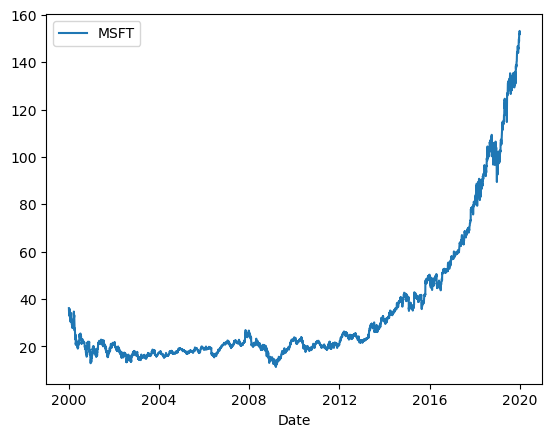

In [4]:
sns.lineplot(data=stock)

In [5]:
stock

,MSFT
Date,
2000-01-03,36.132263
2000-01-04,34.911716
2000-01-05,35.279812
2000-01-06,34.098019
2000-01-07,34.543610
...,...
2019-12-23,151.686264
2019-12-24,151.657333
2019-12-26,152.900421


In [6]:
stock['log_returns'] = np.log(stock['MSFT'].pct_change() + 1)

<AxesSubplot:xlabel='Date', ylabel='log_returns'>

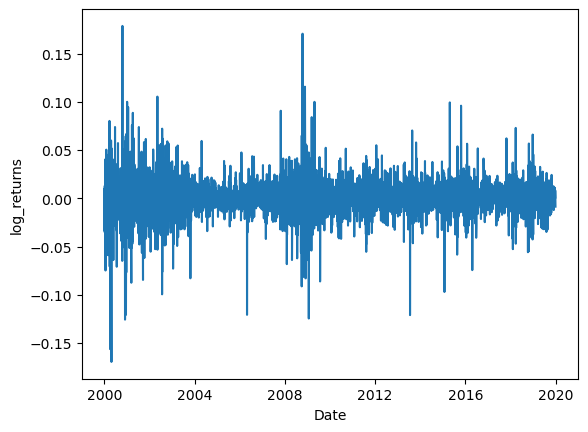

In [7]:
sns.lineplot(data=stock['log_returns'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


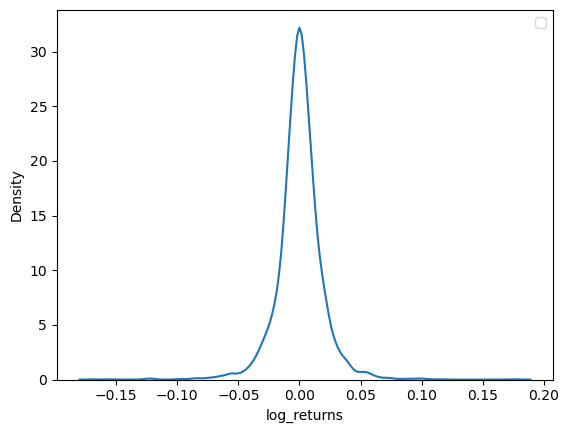

In [8]:
sns.kdeplot(x=stock['log_returns'])
plt.legend()

In [9]:
stock['log_returns'].std()

0.018982383383485513

In [40]:
def stock_input(stocks):
    stock = pd.DataFrame()
    ticker = stocks
    stock[ticker] = yf.download(ticker,start='2000-01-01',end='2022-12-31')['Adj Close']
    stock['log_returns_'+stocks] = np.log(stock[ticker].pct_change() + 1)
    
    sns.lineplot(data=stock[ticker])
    plt.show()
    sns.lineplot(data= stock['log_returns_'+stocks])
    plt.show()
    sns.kdeplot(data=stock['log_returns_'+stocks])
    plt.show()

    

[*********************100%%**********************]  1 of 1 completed


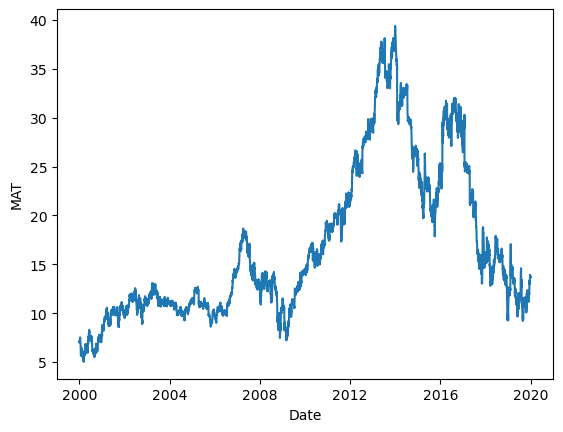

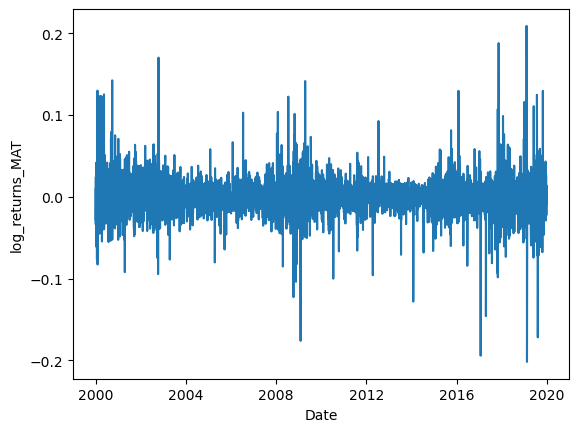

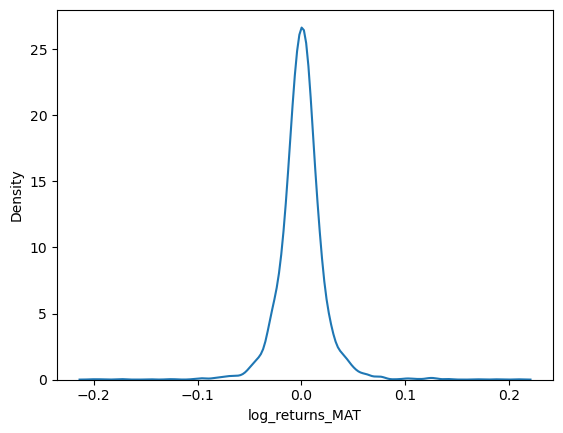

In [11]:
stock_input('MAT')

In [12]:
def stock_analysis(stocks):
    mean = stock['log_returns_'+stocks].mean() 
    var = stock['log_returns_'+stocks].var()
    std = stock['log_returns_'+stocks].std()
    print("log_return mean of {0}".format(stocks), mean)
    print("log_return variance of {0}".format(stocks), var)
    print("log_return std of {0}".format(stocks),std)

   

In [13]:
stock_analysis('MAT')

log_return mean of MAT 0.0001287261663802936
log_return variance of MAT 0.0004745247209492007
log_return std of MAT 0.021783588339601003


<AxesSubplot:xlabel='Date'>

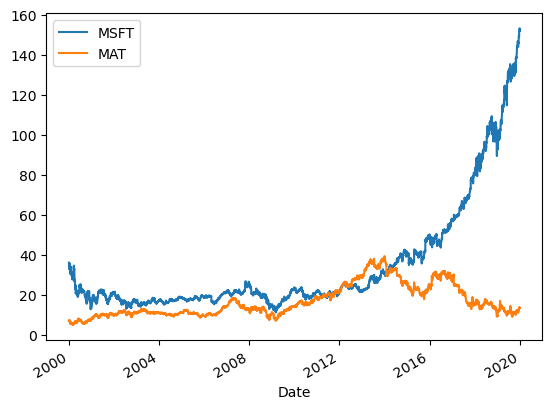

In [14]:
stock[['MSFT','MAT']].plot()

## Simulations

In [15]:
random_n = np.random.rand(10000)
#returns uniform distribution of numbers from 0-1

In [16]:
norm_random_n = norm.ppf(random_n)
#uses the random_n array to sample from the normal distribution

<AxesSubplot:ylabel='Count'>

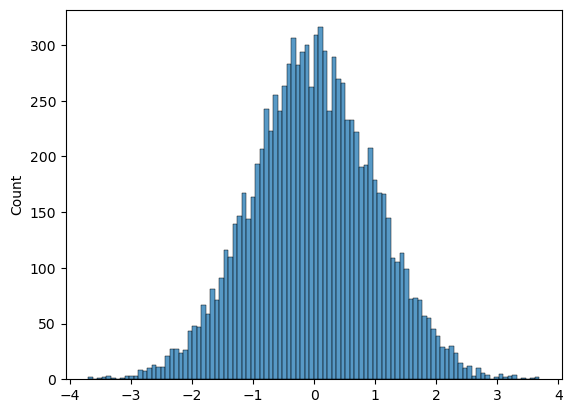

In [17]:
sns.histplot(norm.ppf(random_n),bins=100)

In [18]:
t_days = 250
simulations = 10000

In [19]:
last_price = stock['MSFT'][-1]
#Locate the final price and use it to generate the first value of the simulations

In [20]:
last_price

151.8596954345703

In [21]:
daily_sim_logreturns = stock['log_returns'].std() * norm.ppf(np.random.rand(t_days,simulations))

In [22]:
daily_sim_simplereturns = np.exp(daily_sim_logreturns) 

In [23]:
daily_sim_simplereturns[249,1]

1.0090065537426203

In [24]:
price_list = np.zeros_like(daily_sim_simplereturns)
price_list.shape

(250, 10000)

In [25]:
price_list[0] = last_price
#assign the last historical trading data as the first value in the simulations

In [26]:
price_list

array([[151.85969543, 151.85969543, 151.85969543, ..., 151.85969543,
        151.85969543, 151.85969543],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

 ...]

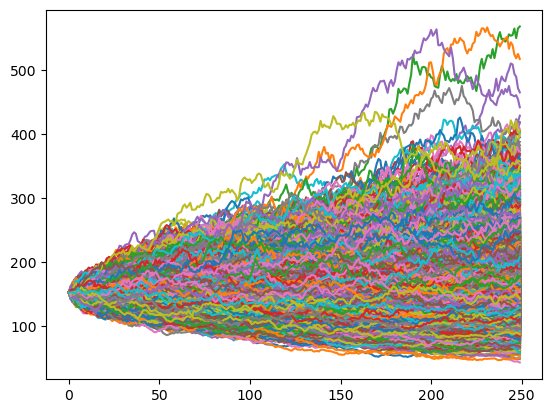

In [27]:
#create for loop to insert other values in the simulations
for t in range(1,t_days):
    price_list[t] = price_list[t-1] * daily_sim_simplereturns[t]
    
#plot
plt.plot(price_list)

## Include Drift
1. Implement Drift in the model

In [28]:
mean = stock['log_returns'].mean()
var = stock['log_returns'].var()
std = stock['log_returns'].std()

In [29]:
#Drift calculation
drift = mean - 0.5*var
drift

0.0001053328415130037

In [30]:
daily_sim_logreturns_drift = daily_sim_logreturns + drift

In [31]:
daily_sim_logreturns_drift

array([[-0.00559573, -0.01755204,  0.02884307, ...,  0.02023666,
        -0.00970611, -0.00449099],
       [ 0.03215084,  0.01256317,  0.01171652, ...,  0.0009195 ,
        -0.01216157,  0.00436588],
       [ 0.04392   , -0.01127407,  0.00739024, ..., -0.01506827,
         0.01360668,  0.00298075],
       ...,
       [-0.00230223, -0.01362724,  0.01833076, ...,  0.00915783,
         0.0121095 ,  0.00812982],
       [-0.02587356, -0.02087483,  0.01657718, ..., -0.00903616,
        -0.02056971,  0.01433608],
       [ 0.0170597 ,  0.00907157, -0.03538165, ..., -0.00866577,
        -0.03113659,  0.01302726]])

In [32]:
daily_sim_simplereturns_drift = np.exp(daily_sim_logreturns_drift)

In [34]:
price_list_drift = np.zeros_like(daily_sim_simplereturns_drift)
price_list_drift[0] = last_price

 ...]

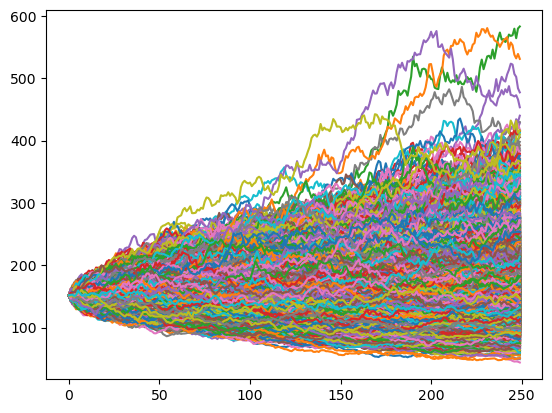

In [35]:
for t in range(1,t_days):
    price_list_drift[t] = price_list_drift[t-1] * daily_sim_simplereturns_drift[t]
    #price today = price yesterday* simple return of today
    
plt.plot(price_list_drift)

In [36]:
# Calculate worst, avg and best scenarios
worst_sim = round(price_list_drift[-1].min(),2)
avg_sim = round(price_list_drift[-1].mean(),2)
best_sim = round(price_list_drift[-1].max(),2)

# Examine the worst, average, and best stock price sceanrios
print("Best, Average and Worst Cases")
print(f"Worst Simulation $/share: {worst_sim}")
print(f"Avg Simulation $/share: {avg_sim}")
print(f"Best Simulation $/share: {best_sim}")

# Set up confidence intervals
mean_finalday_prices = price_list_drift[-1].mean()
std_finalday_prices = price_list_drift[-1].std()
upper_int_1std = mean_finalday_prices + 1 * std_finalday_prices 
lower_int_1std = mean_finalday_prices - 1 * std_finalday_prices
upper_int_2std = mean_finalday_prices + 2 * std_finalday_prices
lower_int_2std = mean_finalday_prices - 2 * std_finalday_prices

# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${lower_int_1std} and ${round(upper_int_1std,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(lower_int_2std,2)} and ${round(upper_int_2std,2)}")

Best, Average and Worst Cases
Worst Simulation $/share: 44.21
Avg Simulation $/share: 162.77
Best Simulation $/share: 582.83

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $112.3503792152504 and $213.19
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $61.93 and $263.61


In [37]:
def return_analysis(price_list):
    # Calculate worst, avg and best scenarios
    worst_sim = round(price_list[-1].min(),2)
    avg_sim = round(price_list[-1].mean(),2)
    best_sim = round(price_list[-1].max(),2)

    # Examine the worst, average, and best stock price sceanrios
    print("Best, Average and Worst Cases")
    print(f"Worst Simulation $/share: {worst_sim}")
    print(f"Avg Simulation $/share: {avg_sim}")
    print(f"Best Simulation $/share: {best_sim}")

    # Set up confidence intervals
    mean_finalday_prices = price_list_drift[-1].mean()
    std_finalday_prices = price_list_drift[-1].std()
    upper_int_1std = mean_finalday_prices + 1 * std_finalday_prices 
    lower_int_1std = mean_finalday_prices - 1 * std_finalday_prices
    upper_int_2std = mean_finalday_prices + 2 * std_finalday_prices
    lower_int_2std = mean_finalday_prices - 2 * std_finalday_prices

    # Print out the price range within the confidence intervals
    print("\n" + "Confidence Intervals")
    print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${lower_int_1std} and ${round(upper_int_1std,2)}")
    print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(lower_int_2std,2)} and ${round(upper_int_2std,2)}")

In [38]:
return_analysis(price_list)

Best, Average and Worst Cases
Worst Simulation $/share: 43.07
Avg Simulation $/share: 158.56
Best Simulation $/share: 567.74

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $112.3503792152504 and $213.19
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $61.93 and $263.61


In [39]:
def simulation(ticker,num,sim):
    t_days = num
    simulations = sim
    #drift calculation
    mean = stock[ticker].mean()
    var = stock[ticker].var()
    std = stock[ticker].std()
    
    drift = mean - 0.5*var
    
    daily_sim_log = norm.ppf(np.random.rand(t_days,simulations)) + drift
    daily_sim_simple = np.exp(daily_sim_log)
    
    #create array with the same shape as the returns
    price_array = np.zeros_like(daily_sim_simple)
    #array is now filled with 0s
    
    #insert final closing price of stock as first price of simulations
    price_array[0] = stock[ticker][-1]
    
    for t in range(1,t_days):
        price_array[t] = price_array[t-1] * daily_sim_simple
        
        #plot 
        plt.plot(price_array)